In [1]:
%pip install pandas matplotlib nltk wordcloud

First few rows of the dataset:
   index                         product                    helpful_count  \
0      0  Apple iPhone XR (64GB) - Black  5,087 people found this helpful   
1      1  Apple iPhone XR (64GB) - Black  2,822 people found this helpful   
2      2  Apple iPhone XR (64GB) - Black  1,798 people found this helpful   
3      3  Apple iPhone XR (64GB) - Black  1,366 people found this helpful   
4      4  Apple iPhone XR (64GB) - Black    536 people found this helpful   

   total_comments                                                url  \
0              24  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
1               6  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
2               0  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
3              14  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
4               5  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   

  review_country reviewed_at  \
0         India   2018-12-12   
1        

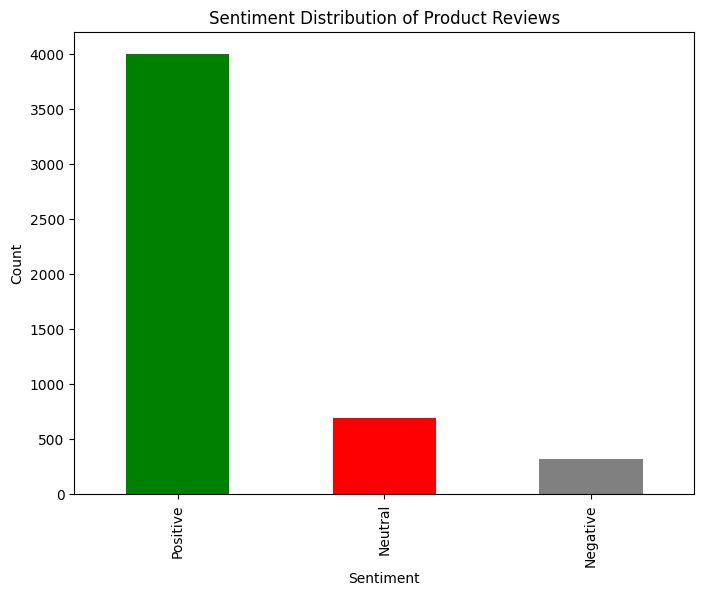

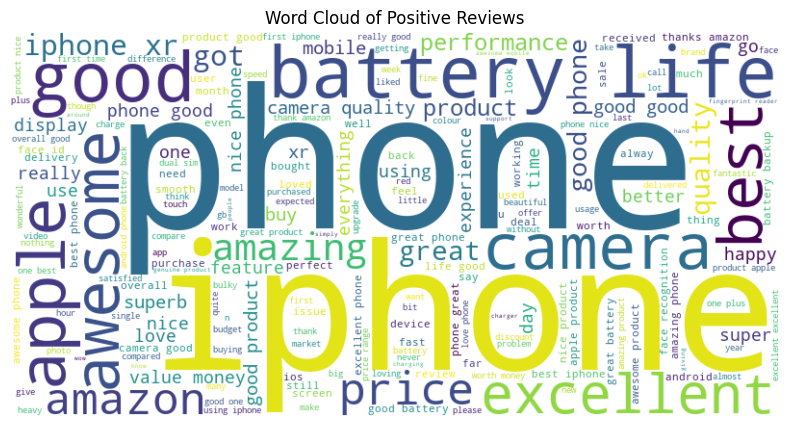


Sentiment analysis complete and results visualized.


In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab',quiet=True)
nltk.download('stopwords', quiet=True)

# Load the dataset # Ensure the file path is correct
file_path = './Dataset/apple_iphone_11_reviews.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary information about the dataset
print("\nDataset summary:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset statistics:")
print(data.describe())

# Handle missing values by replacing NaN with empty strings
data['review_text'] = data['review_text'].fillna('')

# Preprocess text data
def preprocess_text(text):
    if isinstance(text, str):
        # Tokenization
        tokens = word_tokenize(text.lower())

        # Remove punctuation and stopwords
        tokens = [word for word in tokens if word.isalnum()]
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        return ' '.join(tokens)
    else:
        return ''

# Apply preprocessing
try:
    data['cleaned_reviews'] = data['review_text'].apply(preprocess_text)
    print("\nCleaned reviews column created successfully.")
except Exception as e:
    print(f"Error during text preprocessing: {e}")

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
try:
    data['sentiment_scores'] = data['cleaned_reviews'].apply(sia.polarity_scores)
    data['compound'] = data['sentiment_scores'].apply(lambda x: x['compound'])
    data['sentiment'] = data['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))
    print("\nSentiment analysis columns created successfully.")
except KeyError as e:
    print(f"KeyError during sentiment analysis: {e}")
except Exception as e:
    print(f"Error during sentiment analysis: {e}")

# Verify the creation of columns before plotting
if 'sentiment' in data.columns:
    # Visualize the sentiment distribution
    try:
        plt.figure(figsize=(8, 6))
        data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
        plt.title('Sentiment Distribution of Product Reviews')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.show()
    except Exception as e:
        print(f"Error during sentiment distribution visualization: {e}")
else:
    print("Error: 'sentiment' column not found in data.")

# Verify the creation of columns before generating the word cloud
if 'sentiment' in data.columns:
    try:
        positive_reviews = ' '.join(data[data['sentiment'] == 'Positive']['cleaned_reviews'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Positive Reviews')
        plt.show()
    except Exception as e:
        print(f"Error during word cloud generation: {e}")
else:
    print("Error: 'sentiment' column not found in data.")

print("\nSentiment analysis complete and results visualized.")
